<a href="https://colab.research.google.com/github/segnig/African-Credit-Scoring-Challenge/blob/main/Tanzania-Tourism-Prediction%20Public/Missing_Data_Handleing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alfredkondoro_tanzania_tourism_prediction_zindi_africa_path = kagglehub.dataset_download('alfredkondoro/tanzania-tourism-prediction-zindi-africa')

print('Data source import complete.')


100%|██████████| 120k/120k [00:00<00:00, 416kB/s]

Extracting files...
Data source import complete.


In [3]:
!pip -q --disable-pip-version-check install mplcyberpunk

In [29]:
import numpy as np
import pandas as pd

from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import mplcyberpunk
plt.style.use('cyberpunk')
from termcolor import colored

In [30]:
PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

In [31]:
train = pd.read_csv(PATH+"Train.csv")
test = pd.read_csv(PATH+"Test.csv")
ss = pd.read_csv(PATH+"SampleSubmission.csv")
vd = pd.read_csv(PATH+"VariableDefinitions.csv")

In [32]:
train.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [34]:
train_test_data = [train, test]

In [35]:
for df in train_test_data:
    print("MISSING COUNT",
        df.isnull().sum(),
        sep="\n"
    )

MISSING COUNT
ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64
MISSING COUNT
ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arr

In [36]:
for df in train_test_data:
    print("UNIQUE COUNT",
        df.nunique(),
        sep="\n"
    )

UNIQUE COUNT
ID                       4809
country                   105
age_group                   4
travel_with                 5
total_female               14
total_male                 14
purpose                     7
main_activity               9
info_source                 8
tour_arrangement            2
package_transport_int       2
package_accomodation        2
package_food                2
package_transport_tz        2
package_sightseeing         2
package_guided_tour         2
package_insurance           2
night_mainland             64
night_zanzibar             34
payment_mode                4
first_trip_tz               2
most_impressing             7
total_cost               1637
dtype: int64
UNIQUE COUNT
ID                       1601
country                    87
age_group                   4
travel_with                 5
total_female               13
total_male                 10
purpose                     7
main_activity               9
info_source                 8
t

In [37]:
# categorical features

categorical_features = [
    col for col in train.columns if train[col].dtype == 'object'
]

categorical_features

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

Missing values column-wise:
travel_with        1114
total_female          3
total_male            5
most_impressing     313
Name: Missing Values, dtype: int64


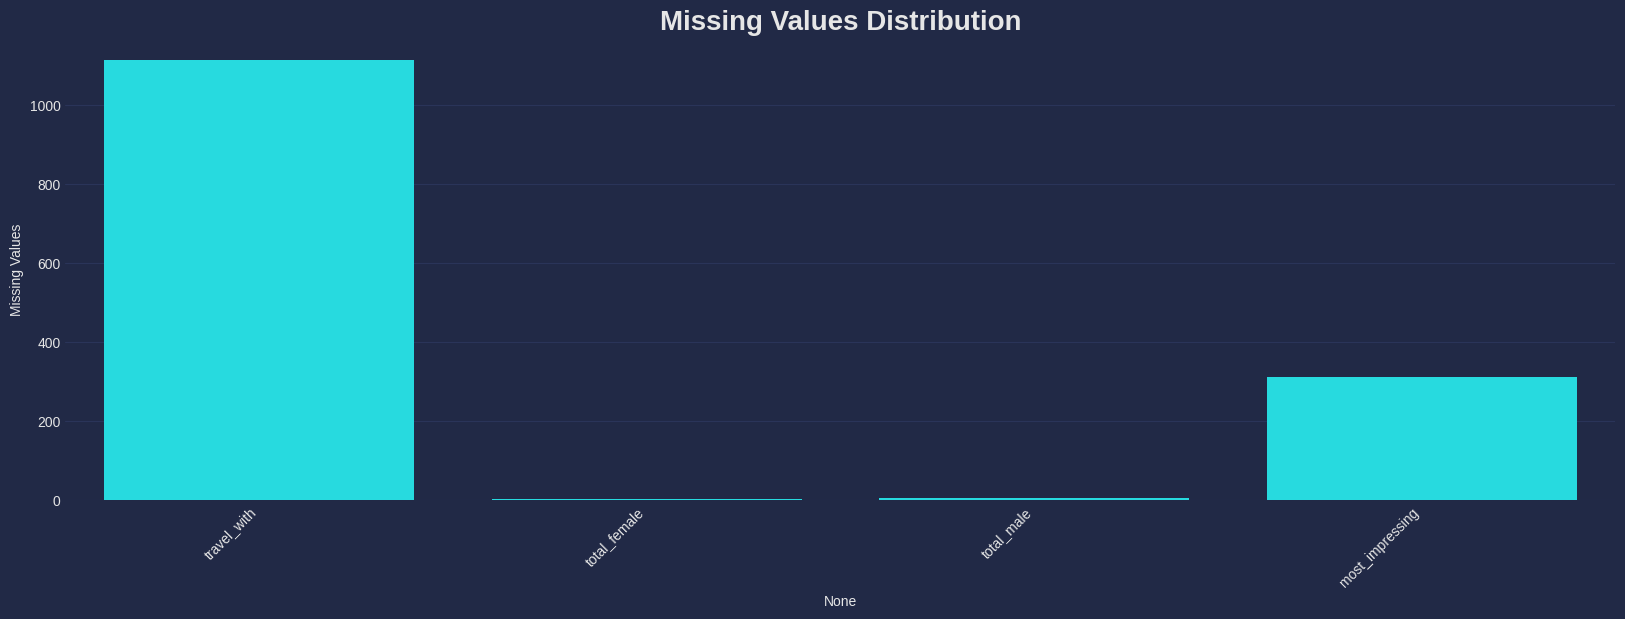

In [16]:
na = pd.DataFrame(train.isna().sum(), columns=['Missing Values'])
na = na[na['Missing Values'] > 0]
plt.figure(figsize=(20, 6))
sns.barplot(y=na['Missing Values'], x=na.index)
plt.title('Missing Values Distribution', size=20, weight='bold')
plt.xticks(rotation=45, ha='right')

print(colored("Missing values column-wise:", 'magenta'))
print(colored(na['Missing Values'], 'magenta'))

plt.show()

In [17]:
train["most_impressing"]

,most_impressing
0,Friendly People
1,"Wonderful Country, Landscape, Nature"
2,Excellent Experience
3,Friendly People
4,No comments
...,...
4804,No comments
4805,Friendly People
4806,Good service
4807,Friendly People


In [18]:
fe = []; cat_fe = []; no_fe = []
for i in train.columns[1:]:
  if train[i].isnull().sum() < 2000:
    fe.append(i)
    if train[i].dtype == 'O':
      cat_fe.append(i)
      print("There are "+ str(len(train[i].value_counts())) + " in " + str(i))
  else:
    no_fe.append(i)

print ('----------------------------------')
print(str(len(fe)))
print(str(len(cat_fe)))
print(str(len(no_fe)))

There are 105 in country
There are 4 in age_group
There are 5 in travel_with
There are 7 in purpose
There are 9 in main_activity
There are 8 in info_source
There are 2 in tour_arrangement
There are 2 in package_transport_int
There are 2 in package_accomodation
There are 2 in package_food
There are 2 in package_transport_tz
There are 2 in package_sightseeing
There are 2 in package_guided_tour
There are 2 in package_insurance
There are 4 in payment_mode
There are 2 in first_trip_tz
There are 7 in most_impressing
----------------------------------
22
17
0


In [19]:
x = train.drop(columns=['total_cost', 'ID'])
y = train['total_cost']
x = x.fillna('')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.18, random_state = 3, shuffle = True)

In [21]:
train_dataset = Pool(data = X_train, label = y_train, cat_features=cat_fe)
test_dataset = Pool(data = X_test, label = y_test, cat_features=cat_fe)

In [22]:
cmod = CatBoostRegressor(iterations = 30000,
                                   learning_rate=0.01,
                                  random_seed = 3, verbose = 300)
cmod.fit(train_dataset, eval_set = test_dataset, early_stopping_rounds = 300, use_best_model = True)

0:	learn: 12104528.9861305	test: 12549463.6061392	best: 12549463.6061392 (0)	total: 73ms	remaining: 36m 29s
300:	learn: 9148719.5594899	test: 10194882.6968294	best: 10194882.6968294 (300)	total: 4.1s	remaining: 6m 44s
600:	learn: 8756918.2946981	test: 10129388.1970838	best: 10129388.1970838 (600)	total: 9.5s	remaining: 7m 44s
900:	learn: 8500138.5849840	test: 10067557.5817695	best: 10067324.0706592 (891)	total: 17.7s	remaining: 9m 33s
1200:	learn: 8248876.4442387	test: 10019179.6083774	best: 10018929.5627055 (1150)	total: 24.2s	remaining: 9m 40s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 10018929.56
bestIteration = 1150

Shrink model to first 1151 iterations.


In [23]:
testc = cmod.predict(X_test)
mean_absolute_error(y_test, testc)

5170256.566188831

In [24]:
mainc = cmod.predict(test[X_test.columns].fillna(''))

In [25]:
ss['total_cost'] = mainc

In [28]:
ss.to_csv(PATH + 'base.csv', index=False)